# A notebook to test ping.py
and to analyze them further

In [1]:
import scipy as sp
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import os
import re as re
import matplotlib.patches as mpatches
import pandas as pd

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from theagamma.ping import ping_coupling
from theoc.oc import load_result

%load_ext lab_black
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [11]:
result_name = "../data/test_ping.pkl"

In [3]:
ping_coupling(
    num_pop=25000,
    num_stim=2500,
    p_stim=0.02,
    stim_rate=1,
    stim_mode="drift",
    file_name=result_name,
    output=False,
    stim_seed=495,
)

[                                        ----------------------------------------


In [4]:
%run ../theagamma/extract.py ../data/test_ping ../data/*_ping.pkl

../data/test_ping.pkl


In [12]:
result = load_result(result_name)

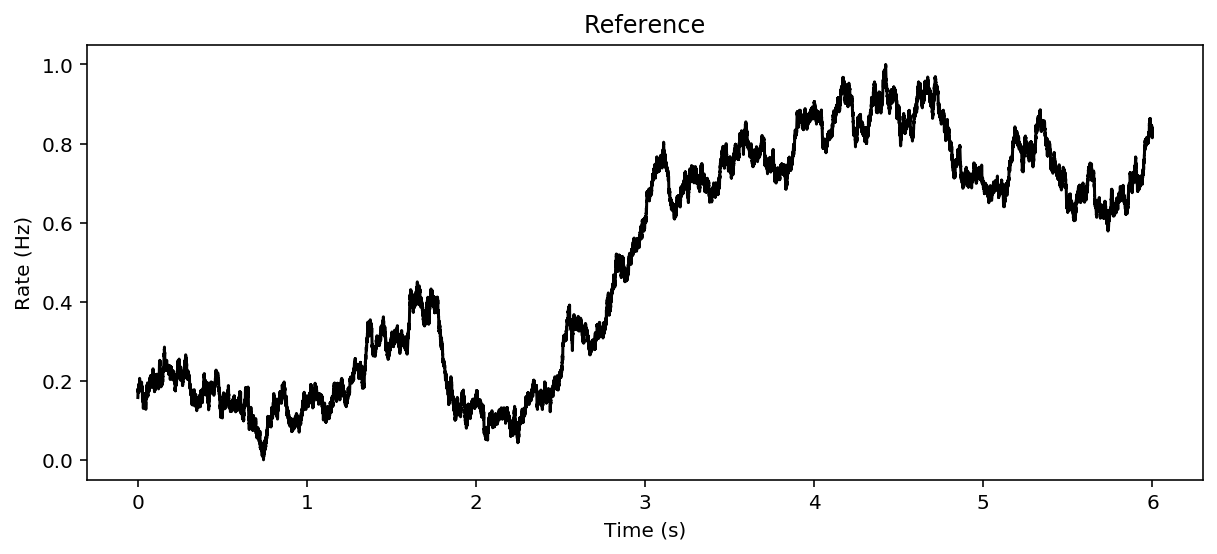

In [20]:
rate = result["norm_rates"]["stim_ref"]
t_rate, _ = result["rates"]["stim_p"]

plt.figure(figsize=(10, 4))
plt.plot(t_rate, rate, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Reference")

# Save
file_name = "../data/test_ping_ref.csv"
d_rate = {}
d_rate["times"] = t_rate
d_rate["rate"] = rate
df = pd.DataFrame(d_rate)
df.to_csv(file_name, index=False)

Text(0.5, 1.0, 'Stimulus')

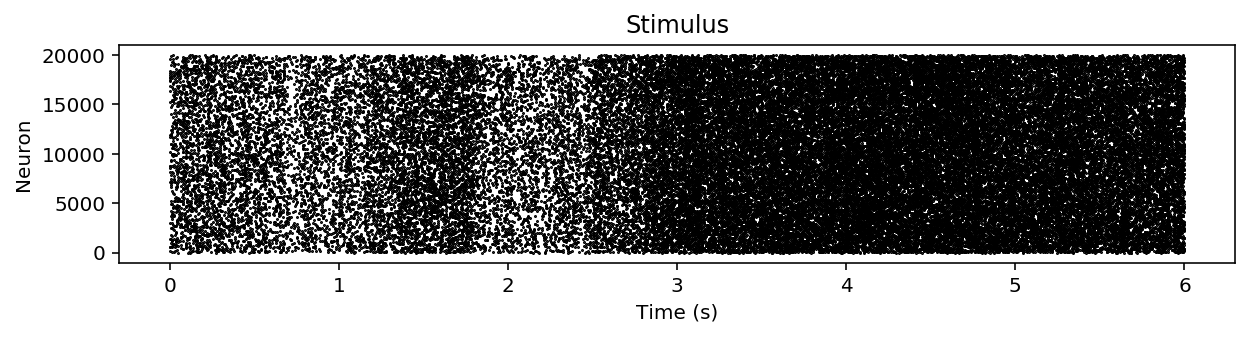

In [21]:
plt.figure(figsize=(10, 2))
plt.plot(*result["spikes"]["stim_p"], ".", markersize=1, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Stimulus")

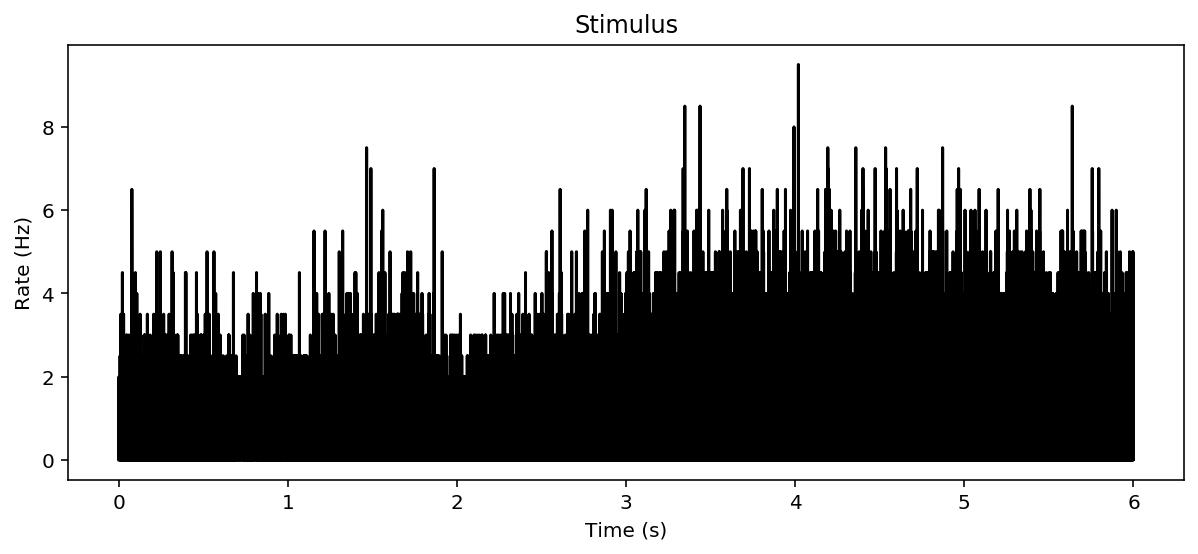

In [22]:
t_rate, rate = result["rates"]["stim_p"]

plt.figure(figsize=(10, 4))
plt.plot(t_rate, rate, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Stimulus")

# Save
file_name = "../data/test_ping_stim.csv"
d_rate = {}
d_rate["times"] = t_rate
d_rate["rate"] = rate
df = pd.DataFrame(d_rate)
df.to_csv(file_name, index=False)

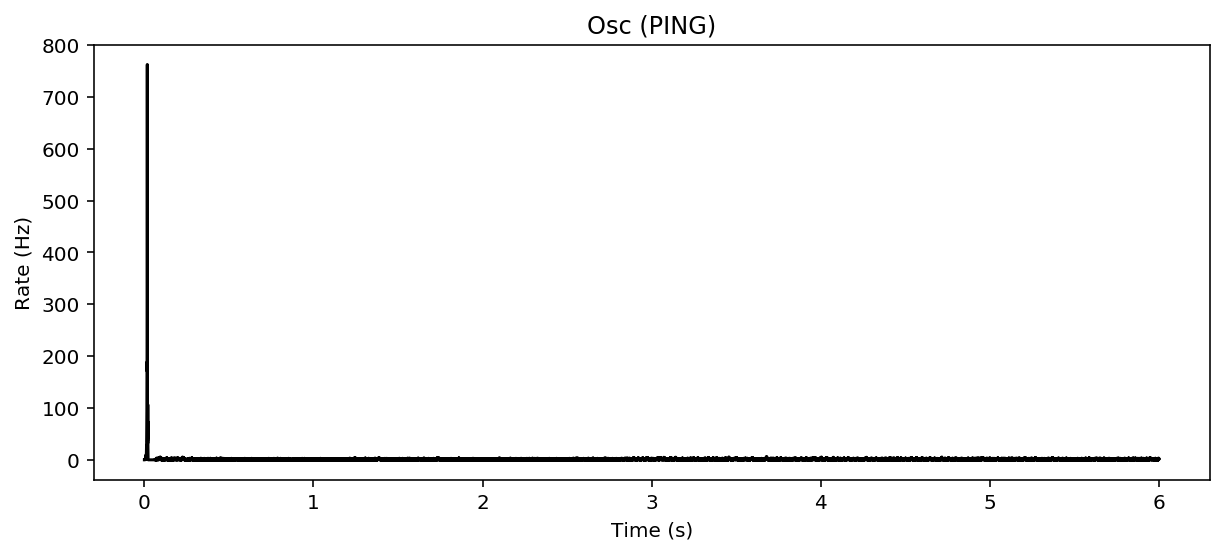

In [24]:
t_rate, rate = result["rates"]["E"]

plt.figure(figsize=(10, 4))
plt.plot(t_rate, rate, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Osc (PING)")

# Save
file_name = "../data/test_ping_osc.csv"
d_rate = {}
d_rate["times"] = t_rate
d_rate["rate"] = rate
df = pd.DataFrame(d_rate)
df.to_csv(file_name, index=False)

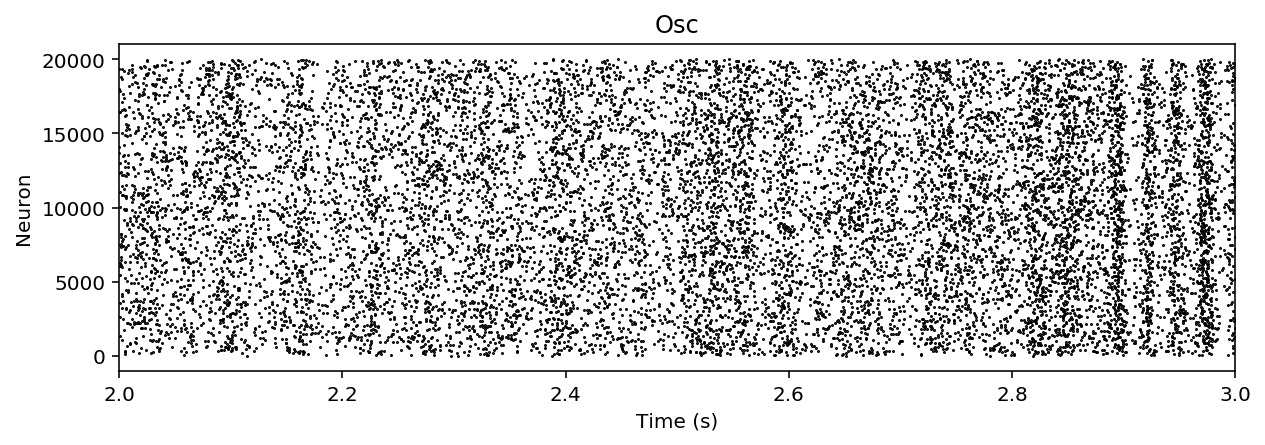

In [25]:
ts, ns = result["spikes"]["E"]

plt.figure(figsize=(10, 3))
plt.plot(ts, ns, ".", markersize=1, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Osc")
plt.xlim(2, 3)

# Save
file_name = "../data/test_ping_oscspks.csv"
dd = {}
dd["ns"] = ns
dd["ts"] = ts
df = pd.DataFrame(dd)
df.to_csv(file_name, index=False)

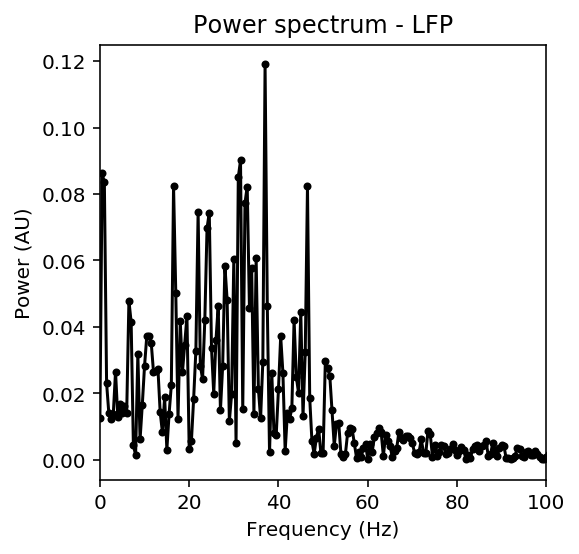

In [26]:
srate = result["srate"]

freqs, spectrum = compute_spectrum(
    result["lfp"]["lfp"],
    fs=srate,
    method="welch",
    avg_type="mean",
    nperseg=srate * 2,
)

plt.figure(figsize=(4, 4))
plt.plot(
    freqs,
    spectrum,
    ".-",
    color="black",
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (AU)")
plt.title("Power spectrum - LFP")
plt.xlim(0, 100)

# Save
file_name = "../data/test_ping_spec.csv"
d_spec = {}
d_spec["freq"] = freqs
d_spec["spectrum"] = spectrum
df = pd.DataFrame(d_spec)
df.to_csv(file_name, index=False)

Text(0.5, 1.0, 'Gamma filtered')

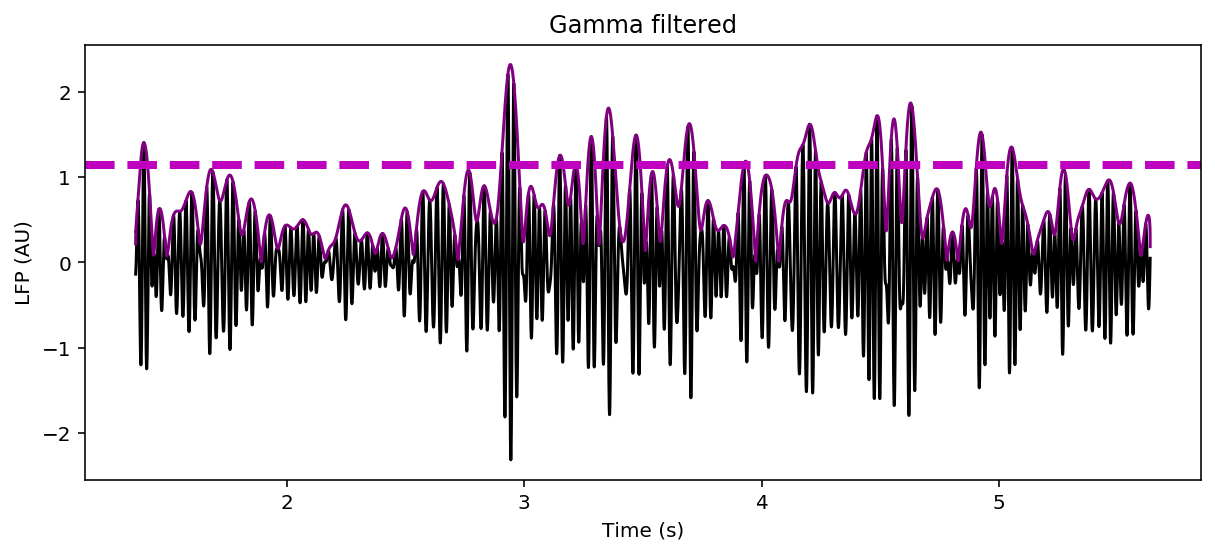

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma"],
    color="black",
)
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma_hilbert"],
    color="purple",
)
plt.axhline(
    y=np.mean(result["lfp"]["lfp_gamma_hilbert"])
    + (1 * np.std(result["lfp"]["lfp_gamma_hilbert"])),
    linestyle="--",
    linewidth=4,
    color="m",
)
plt.xlabel("Time (s)")
plt.ylabel("LFP (AU)")
plt.title("Gamma filtered")

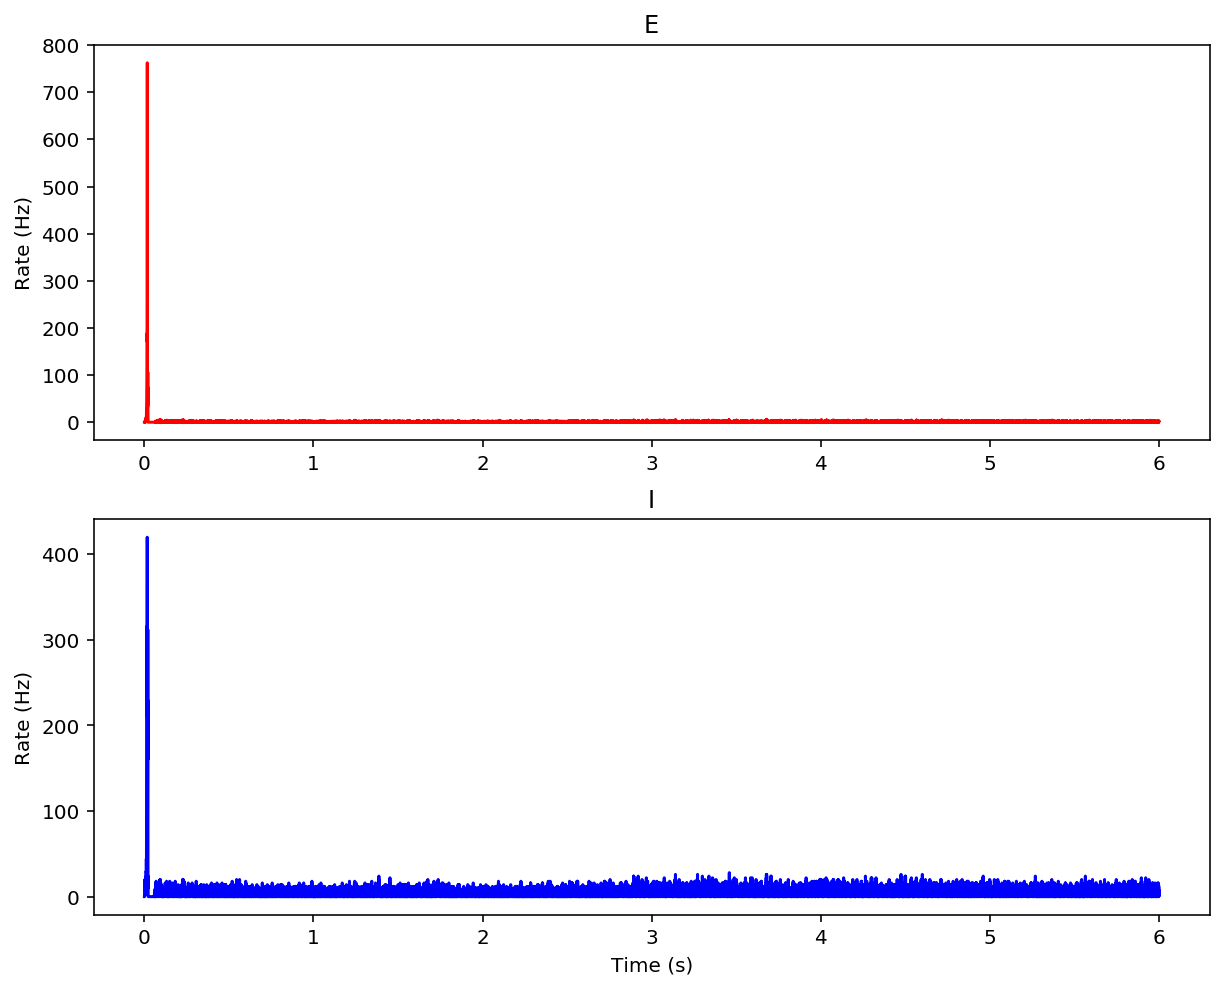

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(*result["rates"]["E"], color="red", label="E")
axes[0].set_ylabel("Rate (Hz)")
axes[0].set_title("E")
axes[1].plot(*result["rates"]["I"], color="blue", label="I")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Rate (Hz)")
axes[1].set_title("I")

# Save
t_rate, rate = result["rates"]["E"]
file_name = "../data/test_ping_osc.csv"
d_rate = {}
d_rate["times"] = t_rate
d_rate["rate"] = rate
df = pd.DataFrame(d_rate)
df.to_csv(file_name, index=False)

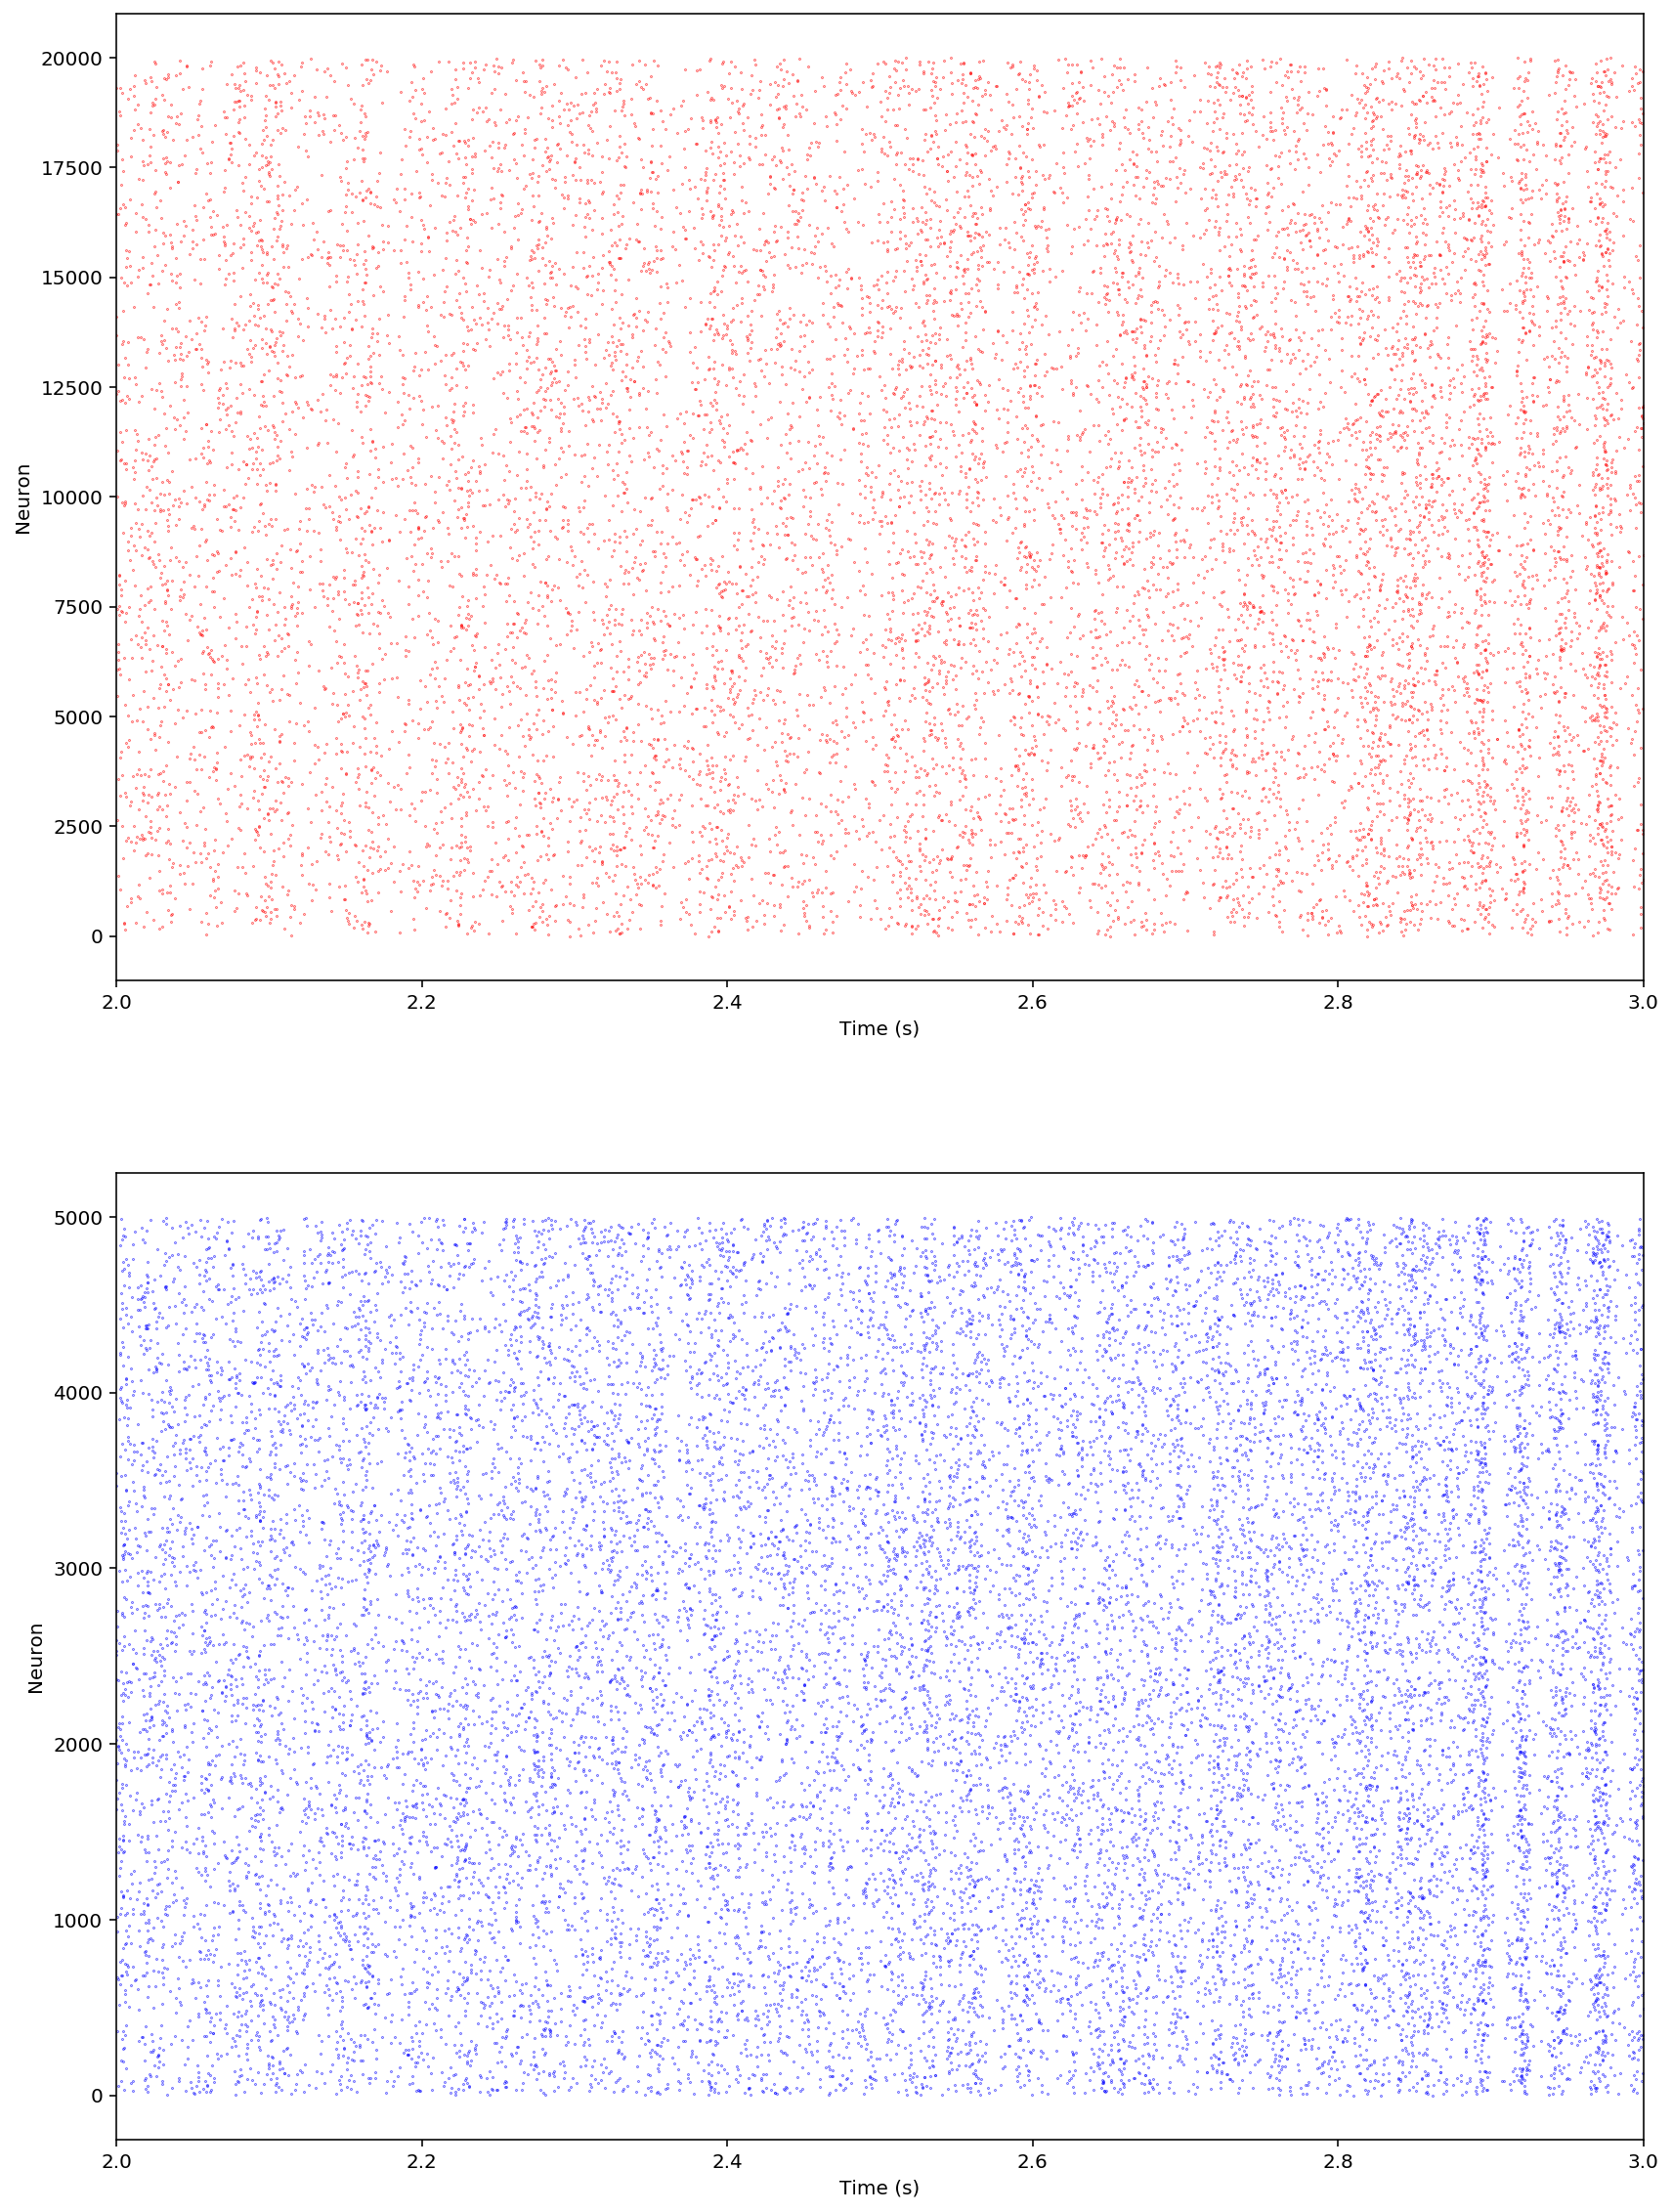

In [29]:
fig, axes = plt.subplots(2, 1, sharey=False, figsize=(14, 20))

axes[0].plot(*result["spikes"]["E"], ".", markersize=0.5, color="red", label="E")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Neuron")
axes[0].set_xlim(2, 3)
axes[1].plot(*result["spikes"]["I"], ".", markersize=0.5, color="blue", label="I")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Neuron")
axes[1].set_xlim(2, 3)

# Save
ts, ns = result["spikes"]["E"]
file_name = "../data/test_ping_oscspks.csv"
dd = {}
dd["ns"] = ns
dd["ts"] = ts
df = pd.DataFrame(dd)
df.to_csv(file_name, index=False)